<a href="https://colab.research.google.com/github/rafiqul0396/LLM/blob/main/ml%20core%20tools/numpy/09_Numpy03_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy-III


## Content

- **Array splitting and Merging**

  - Splitting arrays - `split()`, `hsplit()`, `vsplit()`
  - Merging Arrays - `hstack()`, `vstack()`, `concatenate()`

- **Shallow vs Deep Copy**
- **3D arrays**
- **Use Case: Image Manipulation using Numpy**
  - Opening an Image
  - Details of an image
  - Visualizing RGB Channels
  - Rotating an Image (Transposing a Numpy Array)
  - Saving `ndarray` as Image


In [1]:
import numpy as np

## Array Splitting and Merging


### Splitting

#### `np.split()`

- Splits an array into multiple sub-arrays as views

#### It takes an argument `indices_or_sections`

- If `indices_or_sections` is an **integer, n**, the array will be **divided into n equal arrays along axis**.

- If `indices_or_sections` is a **1-D array of sorted integers**, the entries indicate **where along axis the array is split**.

- If an index **exceeds the dimension of the array along axis**, an **empty sub-array is returned** correspondingly.


In [2]:
x = np.arange(9)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [3]:
np.split(x, 3)

[array([0, 1, 2]), array([3, 4, 5]), array([6, 7, 8])]

In [4]:
np.split(x, [3, 5, 10])

[array([0, 1, 2]), array([3, 4]), array([5, 6, 7, 8]), array([], dtype=int64)]

#### `np.hsplit()`

- Splits an array into multiple sub-arrays **horizontally (column-wise)**.


In [5]:
x = np.arange(16.0).reshape(4, 4)
x

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [12., 13., 14., 15.]])

<img src="https://drive.google.com/uc?export=view&id=1kT8Wx6b15dWj4G3ToMbElNMnde6kVFA-" width="600"/>


- There are 2 axis to a 2-D array

  1. **1st axis - Vertical axis**
  2. **2nd axis - Horizontal axis**

- The split we want happens across the **2nd axis (Horizontal axis)**


In [6]:
np.hsplit(x, 4)

[array([[ 0.],
        [ 4.],
        [ 8.],
        [12.]]),
 array([[ 1.],
        [ 5.],
        [ 9.],
        [13.]]),
 array([[ 2.],
        [ 6.],
        [10.],
        [14.]]),
 array([[ 3.],
        [ 7.],
        [11.],
        [15.]])]

In [7]:
np.hsplit(x, np.array([3, 6]))

[array([[ 0.,  1.,  2.],
        [ 4.,  5.,  6.],
        [ 8.,  9., 10.],
        [12., 13., 14.]]),
 array([[ 3.],
        [ 7.],
        [11.],
        [15.]]),
 array([], shape=(4, 0), dtype=float64)]

#### `np.vsplit()`

- Splits an array into multiple sub-arrays **vertically (row-wise)**.


In [8]:
x = np.arange(16.0).reshape(4, 4)
x

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [12., 13., 14., 15.]])

<img src="https://drive.google.com/uc?export=view&id=1A76WbXm31AWPJJ1h-pxtHespMspOexkJ" width="600"/>


- The split we want happens across the **1st axis (Vertical axis)**


In [9]:
np.vsplit(x, 2)

[array([[0., 1., 2., 3.],
        [4., 5., 6., 7.]]),
 array([[ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])]

In [10]:
np.vsplit(x, np.array([3]))

[array([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]]),
 array([[12., 13., 14., 15.]])]

### Stacking

<img src="https://drive.google.com/uc?export=view&id=1j75pkNLO6U5kddrQgQT9oaRFDHHSrdbt" width="500"/>


#### `np.vstack()`

- Stacks a list of arrays **vertically (along axis 0 or 1st axis)**


In [11]:
data = np.arange(5)
data

array([0, 1, 2, 3, 4])

In [12]:
np.vstack((data, data, data))

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

#### Now, What if we want to stack the array like this?

<img src="https://drive.google.com/uc?export=view&id=16vlBMHDzFBHOXDHRq0rgQhM2h61T1zsg" width="400"/>


#### `np.hstack()`

- Stacks a list of arrays horizontally (along axis 1)


In [13]:
data = np.arange(5).reshape(5,1)
data

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [14]:
np.hstack((data, data, data))

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])

#### Example

```
a = np.array([[1], [2], [3]])
b = np.array([[4], [5], [6]])
np.hstack((a, b))
```


In [15]:
a = np.array([[1], [2], [3]])
a

array([[1],
       [2],
       [3]])

In [16]:
b = np.array([[4], [5], [6]])
b

array([[4],
       [5],
       [6]])

In [17]:
np.hstack((a, b))

array([[1, 4],
       [2, 5],
       [3, 6]])

### `np.concatenate()`

- Creates a new array by appending arrays after each other, along a given axis


In [18]:
z = np.array([[2, 4]])
z

array([[2, 4]])

In [19]:
z.ndim

2

In [20]:
zz = np.concatenate([z, z], axis=0)
zz

array([[2, 4],
       [2, 4]])

In [21]:
zz = np.concatenate([z, z], axis=1)
zz

array([[2, 4, 2, 4]])

#### few more examples using `np.concatenate()`

```
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])
np.concatenate((a, b), axis=0)
```


In [22]:
a = np.array([[1, 2], [3, 4]])
a

array([[1, 2],
       [3, 4]])

In [23]:
b = np.array([[5, 6]])
b

array([[5, 6]])

In [24]:
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

#### `axis = 0` ---> It's a vertical axis

- So, **changes will happen along vertical axis**


#### When we **don't specify the axis (`axis=None`)**, `np.concatenate()` **flattens the arrays and concatenates them as 1-D row array**


In [25]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])
np.concatenate((a, b), axis=None)

array([1, 2, 3, 4, 5, 6])

---


## Views vs Copies (Shallow vs Deep Copy)

- Numpy **manages memory very efficiently** which makes it really **useful while dealing with large datasets**


In [26]:
# We'll create np array

a = np.arange(4)
a

array([0, 1, 2, 3])

In [27]:
# Reshape array `a` and store in b

b = a.reshape(2, 2)
b

array([[0, 1],
       [2, 3]])

In [28]:
a[0] = 100
a

array([100,   1,   2,   3])

In [29]:
b

array([[100,   1],
       [  2,   3]])

- Array **`b` got automatically updated**

### This is an example of Numpy using "Shallow Copy" of data

- Numpy **re-uses data** as much as possible **instead of duplicating** it

#### How data is stored using Numpy?

- Variable **does NOT directly point to data** stored in memory

- There is something called **Header** in-between

### What does Header do?

- **Variable points to header** and **header points to data** stored in memory

- Header stores **information about data** - called **Metadata**

#### `a` is pointing to Metadata about our data `[0, 1, 2, 3]`, which may include:

- **How many values** we have --> 4

- What is the **Data Type** of data --> `int`

- What's the **Shape** --> `(4,)`

#### When we do `b = a.reshape(2, 2)`

- It **uses the same data**

- And **create a New header for `b`** that **points to the same data** as pointed to by `a`

#### `b` points to a new Header having different values of Metadata of the same data:

- **Number of values** --> 4

- **Data Type** --> `int`

- **Shape** --> `(2, 2)`


In [30]:
a = np.arange(4)
a

array([0, 1, 2, 3])

In [31]:
# Create `c`

c = a + 2
c

array([2, 3, 4, 5])

In [32]:
# We make changes in a

a[0] = 100
a

array([100,   1,   2,   3])

In [33]:
c

array([2, 3, 4, 5])

### Conclusion:

- Numpy is able to **use same data** for **simpler operations** like **reshape** ---> **Shallow Copy**

- It creates a **copy of data** where operations make **more permanent changes** to data ---> **Deep Copy**

#### check whether two arrays are sharing memory or not? => `np.shares_memory()`


In [34]:
a= np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [35]:
b = a[::2]
b

array([0, 2, 4, 6, 8])

In [36]:
np.shares_memory(a,b)

True

In [37]:
b[0] = 2
b

array([2, 2, 4, 6, 8])

In [38]:
a

array([2, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [39]:
b = a +2

In [40]:
np.shares_memory(a,b)

False

---


## 3 Dimensional Arrays


### Vectors, Matrix and Tensors

1. **Vector** ---> **1-Dimensional** Array
2. **Matrix** ---> **2-Dimensional** Array
3. **Tensor** ---> **3 and above Dimensional** Array

#### `Tensor` is a general term we use

- Tensor can also be less than 3D

- **2D Tensor** is called a **Matrix**
- **1D Tensor** is called a **Vector**


In [41]:
B = np.arange(24).reshape(2, 3, 4)
B

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

- It's a **3-dimensional tensor**

- It is giving 2 matrices and each matrix has 3 rows and 4 columns

#### So, that's how reshape() is interpreted for 3D

- **1st argument** gives **depth** (No. of Matrices)

- **2nd agrument** gives **no. of rows** in each depth

- **3rd agrument** gives **no. of columns** in each depth


In [42]:
B[0] #gets just whole 1st Matrix

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [43]:
B[0, 0, 0] #gives first element of the first matrix

0

In [44]:
#### Question: What value will I get if I do `B[1, 1, 1]`?
B[1, 1, 1]

# It looks at Matrix 1, that is, 2nd Matrix (Not Matrix 0)
# Then it looks at row 1 of matrix 1
# Then it looks at column 1 of row 1 of matrix 1

17

## Use Case: Image Manipulation using Numpy


In [45]:
import numpy as np
import matplotlib.pyplot as plt

## Opening an Image

**`imread()` – to read the images**

**`imshow()` – to display the images**


In [46]:
#fruits image
!gdown 17tYTDPBU5hpby9t0kGd7w_-zBsbY7sEd

Downloading...
From: https://drive.google.com/uc?id=17tYTDPBU5hpby9t0kGd7w_-zBsbY7sEd
To: /content/fruits.png
100% 4.71M/4.71M [00:00<00:00, 21.0MB/s]


In [47]:
#emma stone image
!gdown 1o-8yqdTM7cfz_mAaNCi2nH0urFu7pcqI

Downloading...
From: https://drive.google.com/uc?id=1o-8yqdTM7cfz_mAaNCi2nH0urFu7pcqI
To: /content/emma_stone.jpeg
100% 80.3k/80.3k [00:00<00:00, 65.5MB/s]


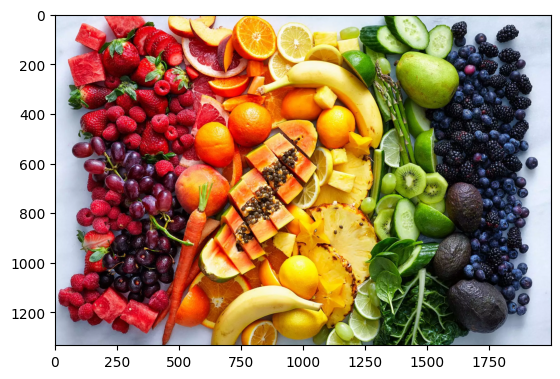

In [48]:
img = np.array(plt.imread('fruits.png'))
plt.imshow(img)

## Details of an Image


In [49]:
print('# of dims: ',img.ndim)     # dimension of an image
print('Img shape: ',img.shape)    # shape of an image

# of dims:  3
Img shape:  (1333, 2000, 3)


- **Coloured images have a 3rd dimension for depth or RGB colour channel**

#### Why is there a difference b/w normal np array and the np array generated from Matplotlib in terms of where the depth part of `shape` appears?

- This is how `matplotlib` reads the image

- It **reads the depth values (R, G and B values) of each pixel one by one** and stacks them one after the other

- `matplotlib` **first reads that each plane has $1333\times2000$ pixels**

- Then, it **reads depth values (R, G and B values) of each pixel and place the values in 3 separate planes**


## Visualizing RGB Channels

We can split the image into each RGB color channels using only Numpy

- The image is made up of **3 components/channels** - **Red, Green, Blue** - which form RGB values

- Coloured images are usually stored as 3-dimensional arrays of **8-bit unsigned integers**

- That is, each pixel's each channel, R, G and B can range from **0 to 255**

- So, a pixel **[255, 0, 0 ]** will be **RED** in colour

- A pixel **[0, 255, 0]** will be **GREEN** in colour

- A pixel **[0, 0, 255]** will be **BLUE** in colour

#### Now, Let's separate the R, G, B channels in our image:

- For **RED** channel, we'll **set values of GREEN and BLUE to 0**

- Similarly, for GREEN channel, we'll set values of RED and BLUE to 0


In [50]:
img = np.array(plt.imread('fruits.png'))

img_R, img_G, img_B = img.copy(), img.copy(), img.copy()

img_R[:, :, (1, 2)] = 0
img_G[:, :, (0, 2)] = 0
img_B[:, :, (0, 1)] = 0

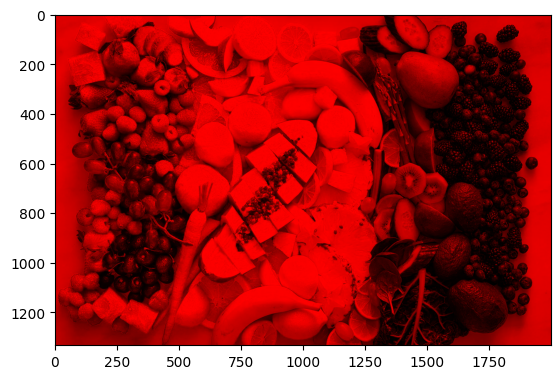

In [51]:
plt.imshow(img_R)

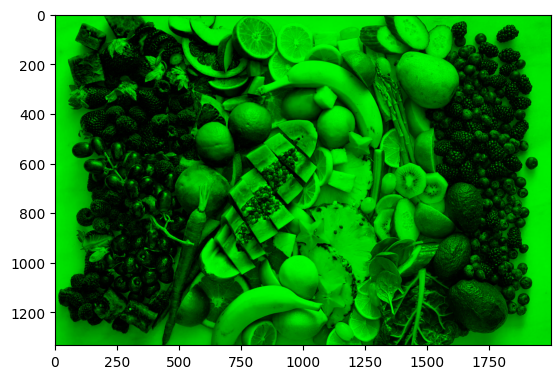

In [52]:
plt.imshow(img_G)

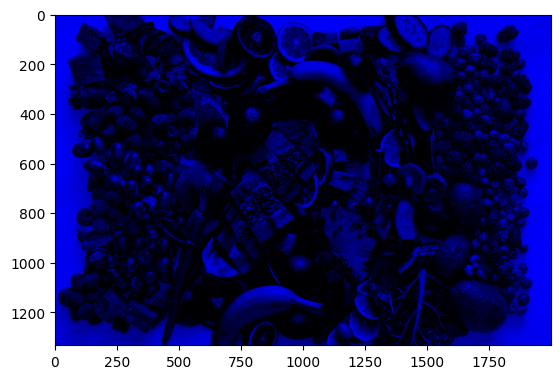

In [53]:
plt.imshow(img_B)

### Converting Image to Gray Scale

- A gray scale image is one which **only has 1 channel** - Either R or G or B

- We can get images having a single channel using the concept of **slicing in Numpy**

- **RED channel** is at **depth index 0**
- **GREEN channel** is at **depth index 1**
- **BLUE channel** is at **depth index 2**

#### For example, to get grayscale image only for RED channel, we have to do something like:

- `image[:, :, 0]` means get **all rows, all columns**, and the **first (at index 0) color channel**, which is the **RED channel**.


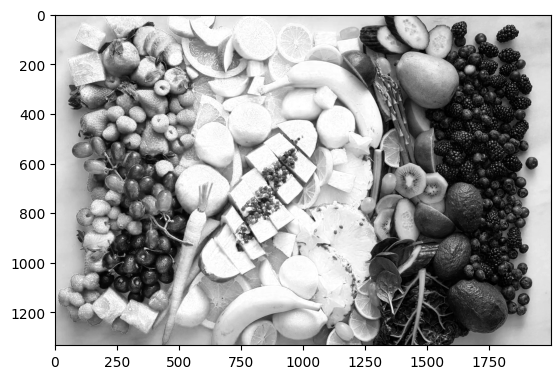

In [54]:
img = np.array(plt.imread('fruits.png'))

img_R_grayscale = img[:,:,0]
plt.imshow(img_R_grayscale, cmap='gray')

# Matplotlib uses a colormap by default when plotting a single channel.
# So, we have to specify `cmap='gray' within the `imshow() function

#### Let's check the shape of this gray scale image with only RED channel


In [55]:
img_R_grayscale.shape

(1333, 2000)

**GREEN channel is at depth index 1 and BLUE channel is at depth index 2**

- **`image[:, :, 1]`** ---> **Gray Scale image** with **only GREEN** channel

- **`image[:, :, 2]`** ---> **Gray Scale image** with **only BLUE** channel


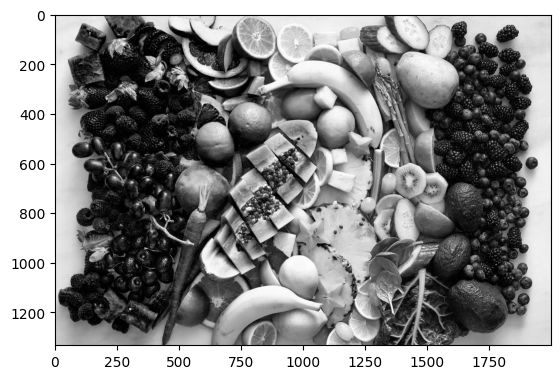

In [56]:
img_G_grayscale = img[:,:,1]
plt.imshow(img_G_grayscale, cmap='gray')

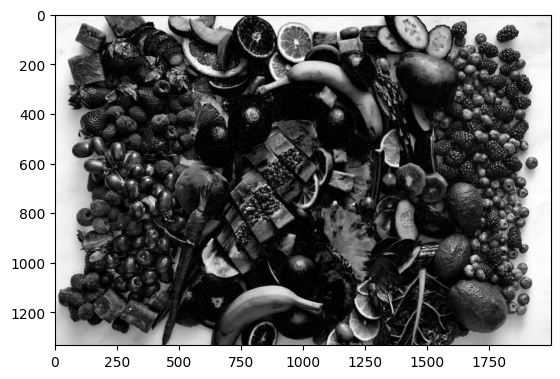

In [57]:
img_B_grayscale = img[:,:,2]
plt.imshow(img_B_grayscale, cmap='gray')

## Rotating an Image (Transpose the Numpy Array)

- **Rotating the image means transposing the array**

#### For this, we'll use the `np.transpose()` function in numpy

**Function documentation: https://numpy.org/doc/stable/reference/generated/numpy.transpose.html**

- It takes 2 arguments

**1st argument** is **array that we want to transpose**

**2nd argument is `axes`**

- Its a **tuple or list of ints**

- It contains a **permutation of [0,1,..,N-1] where N is the number of axes of array**

#### Now, our image array has 3 axes (3 dimensions) ---> 0th, 1st and 2nd

- **Vertical axis (Row axis) is 0th axis**
- **Horizontal axis (Column axis) is 1st axis**
- **Depth axis is 2nd axis**

- So, we want to **interchange the order of row and column axis** ---> **interchange order of 0th and 1st axis**

- We **don't want to change the depth axis (2nd axis)** ---> So, it will **remain at its original order position**

Now, the **order of axes in orginal image is `(0, 1, 2)`**

- The **order of axes in rotated image will be `(1, 0, 2)`**


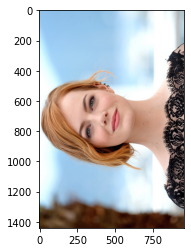

In [ ]:
img = np.array(plt.imread('emma_stone.jpg'))
img_rotated = np.transpose(img, (1,0,2))
plt.imshow(img_rotated)

## Saving Image as `ndarray`


In [ ]:
path = 'emma_face.jpg'
plt.imsave(path, img_rotated)